# GIK2KM Data Science & Machine Learning

Dalarna University, VT25

© Joonas Pääkkönen

## Lab 3: Machine Learning (released May 5th, 2025)

## Deadline: Monday May 12th, 2025, 23:59 CET time

It is okay to work in pairs. However, if you work with another student, add his or her name below, too.

Upload your .ipynb file to Canvas. Use file name format “lab3 firstname lastname studentid.ipynb",
e.g., “lab3 jim jonsson v21abcde hanna jansson v21abcda.ipynb”. For this lab no video is to be recorded.

For grade G, execute all the given tasks.

Use Scikit-learn first and foremost, with the help of Pandas, NumPy, SciPy, Matplotlib and Seaborn, if needed.
Remember that Pandas dataframes come in very handy in data science.

Note: pairplots may take several seconds or even minutes to plot depending on how fast your system is.

Plagiarism: Do not blindly copy-paste anything. You need to be able to explain your solution in your own words and analyze the results. The plagiarism rules of the university apply. As explained above, you may work in pairs but in that case, add both names and email addresses below.

Make sure that your code runs before submitting.

Include all the outputs in the submission. This includes e.g. all pairplots, other figures, numerical values, etc.

Use Markdown cells for text explanations, and code cells for Python/Sklearn code.

Do not modify the title or this header information other than adding your name(s) and email(s) below:

### Student name(s): 
Patrik Peterspn
Zackarias Andersson

### DU email address(es): 
h23patpe@du.se
h23zacan@du.se

## Task 1: k-means clustering

Task 1.1: Download the dry+bean+dataset.zip file from
https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset and save Dry_Bean_Dataset.xlsx to variable beandata.

In [1]:
import pandas as pd
!pip install openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Load the Excel file into a DataFrame
beandata = pd.read_excel('Dry_Bean_Dataset.xlsx')

# Display the first few rows of the DataFrame
print(beandata.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

Task 1.2: Plot the pairplot of beandata with hue set to "Class".

In [2]:
# Create the pairplot
#sns.pairplot(beandata, hue="Class")

# Show the plot
#plt.show()


Task 1.3: As it is explained on the "Dry Bean" website (see the link in Task 1.1), here the "Class" variable can be regarded as a categorical variable and the target variable in classification, and the other 16 variables can simply be called features. How many different classes are there for the target variable, and what are those classes? In other words, how many different beans are there, and what are their names?

There are 7 different registered dry beans named: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira

Task 1.4: Create a OneHotEncoder (from sklearn.preprocessing) and use it convert the classes into binary vectors.

In [3]:
encoder = OneHotEncoder(sparse_output=False)
class_encoded = encoder.fit_transform(beandata[['Class']])


class_encoded_df = pd.DataFrame(class_encoded, columns=encoder.get_feature_names_out(['Class']))

print(class_encoded_df)

# Only to demenstrate all values inside classes
print(beandata['Class'].value_counts())



       Class_BARBUNYA  Class_BOMBAY  Class_CALI  Class_DERMASON  Class_HOROZ  \
0                 0.0           0.0         0.0             0.0          0.0   
1                 0.0           0.0         0.0             0.0          0.0   
2                 0.0           0.0         0.0             0.0          0.0   
3                 0.0           0.0         0.0             0.0          0.0   
4                 0.0           0.0         0.0             0.0          0.0   
...               ...           ...         ...             ...          ...   
13606             0.0           0.0         0.0             1.0          0.0   
13607             0.0           0.0         0.0             1.0          0.0   
13608             0.0           0.0         0.0             1.0          0.0   
13609             0.0           0.0         0.0             1.0          0.0   
13610             0.0           0.0         0.0             1.0          0.0   

       Class_SEKER  Class_SIRA  
0     

Task 1.5: What is the binary vector into which Sira beans were encoded?

In [4]:
# Hitta första index där klassen är 'SIRA'
sira_index = beandata[beandata['Class'] == 'SIRA'].index[0]

# Visa binära vektorn
print("SIRA-bean kodades till vektorn:")
print(class_encoded_df.iloc[sira_index].values)

# The anser is [0. 0. 0. 0. 0. 0. 1.]

SIRA-bean kodades till vektorn:
[0. 0. 0. 0. 0. 0. 1.]


Task 1.6: Plot a scatterplot with Compactness on the x-axis and Minor Axis Length on the y-axis. Here all the datapoints should have the same color.

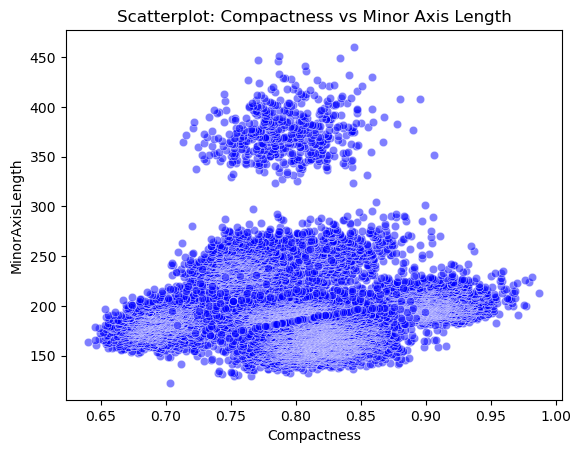

In [5]:
sns.scatterplot(
    x='Compactness',
    y='MinorAxisLength',
    data=beandata,
    color='blue',  # Alla punkter samma färg
    alpha=0.5
)
plt.title('Scatterplot: Compactness vs Minor Axis Length')
plt.show()

Task 1.7: Use the Sklearn k-means algorithm to cluster the data into $k=2$ clusters, and plot a scatterplot that shows the clusters in different colors.

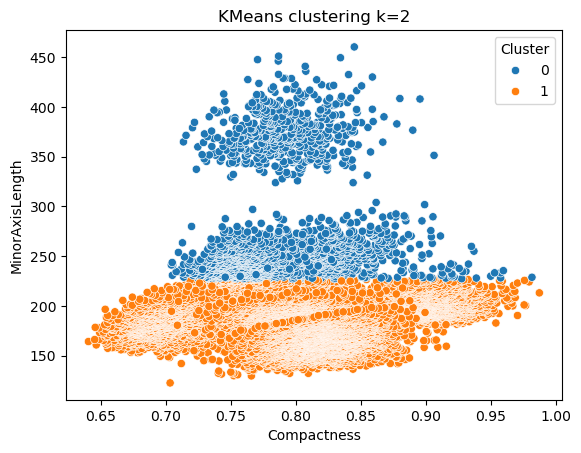

In [6]:
X = beandata[['Compactness', 'MinorAxisLength']]

kmeans = KMeans(n_clusters=2, random_state=42)

clusters = kmeans.fit_predict(X)

beandata['Cluster'] = clusters



sns.scatterplot(
    x='Compactness',
    y='MinorAxisLength',
    data=beandata,
    hue='Cluster'
)
plt.title('KMeans clustering k=2')
plt.show()


Task 1.8: Explain in your own words what the silhouette score is. This information can be found on the Sklearn website.

The siluette score is a mesure of how good each datapoint has been grouped in a cluster analysis for example KMeans. It shows how good a point fits in their own cluster in comparison to other clusters.

Task 1.9: Use Sklearn to find and print the silhouette score of the clustering of Task 1.7.

In [7]:
# Gör om samma variabler och data från föregående cell
X = beandata[['Compactness', 'MinorAxisLength']]

# Skapa och träna kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Beräkna silhouette score
score = silhouette_score(X, labels)

print(f"Silhouette score k=2: {score:.3f}")



Silhouette score k=2: 0.647


Task 1.10: Use the Sklearn k-means algorithm to cluster the data into $k=3$ clusters, and plot a scatterplot that shows the three clusters in different colors.

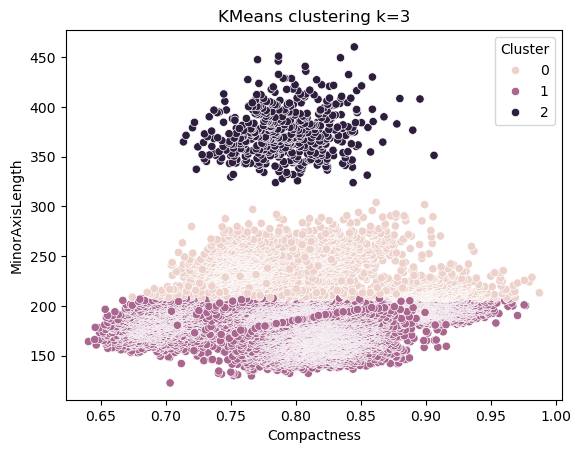

In [8]:
X = beandata[['Compactness', 'MinorAxisLength']]

kmeans = KMeans(n_clusters=3, random_state=42)

clusters = kmeans.fit_predict(X)

beandata['Cluster'] = clusters



sns.scatterplot(
    x='Compactness',
    y='MinorAxisLength',
    data=beandata,
    hue='Cluster'
)
plt.title('KMeans clustering k=3')
plt.show()


Task 1.11: Use Sklearn to find and print the silhouette score of the clustering of Task 1.10.

In [9]:
# Gör om samma variabler och data från föregående cell
X = beandata[['Compactness', 'MinorAxisLength']]

# Skapa och träna kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Beräkna silhouette score
score = silhouette_score(X, labels)

print(f"Silhouette score k=3: {score:.3f}")

Silhouette score k=3: 0.628


Task 1.12: Which number of clusters, with $k=2$ or $k=3$, gave the better performance in terms of the silhouette score? Are the results in line with what you see in the figures? Which number of clusters seems more suitable when you look at the scatterplots? Explain in your own words below.

The higer the siluettescore (0.5-1) the better separation it is, so we can see that a cluster of 2

## Task 2: Comparing clustering algorithms

Task 2.1: Download buddymove+data+set.zip from https://archive.ics.uci.edu/ml/datasets/BuddyMove+Data+Set and save the buddymove_holidayiq.csv dataset to a variable called buddydata.

In [10]:
buddydata = pd.read_csv("buddymove_holidayiq.csv")

Task 2.2: Use Seaborn to plot the pairplot of buddydata with only one color for each datapoint.

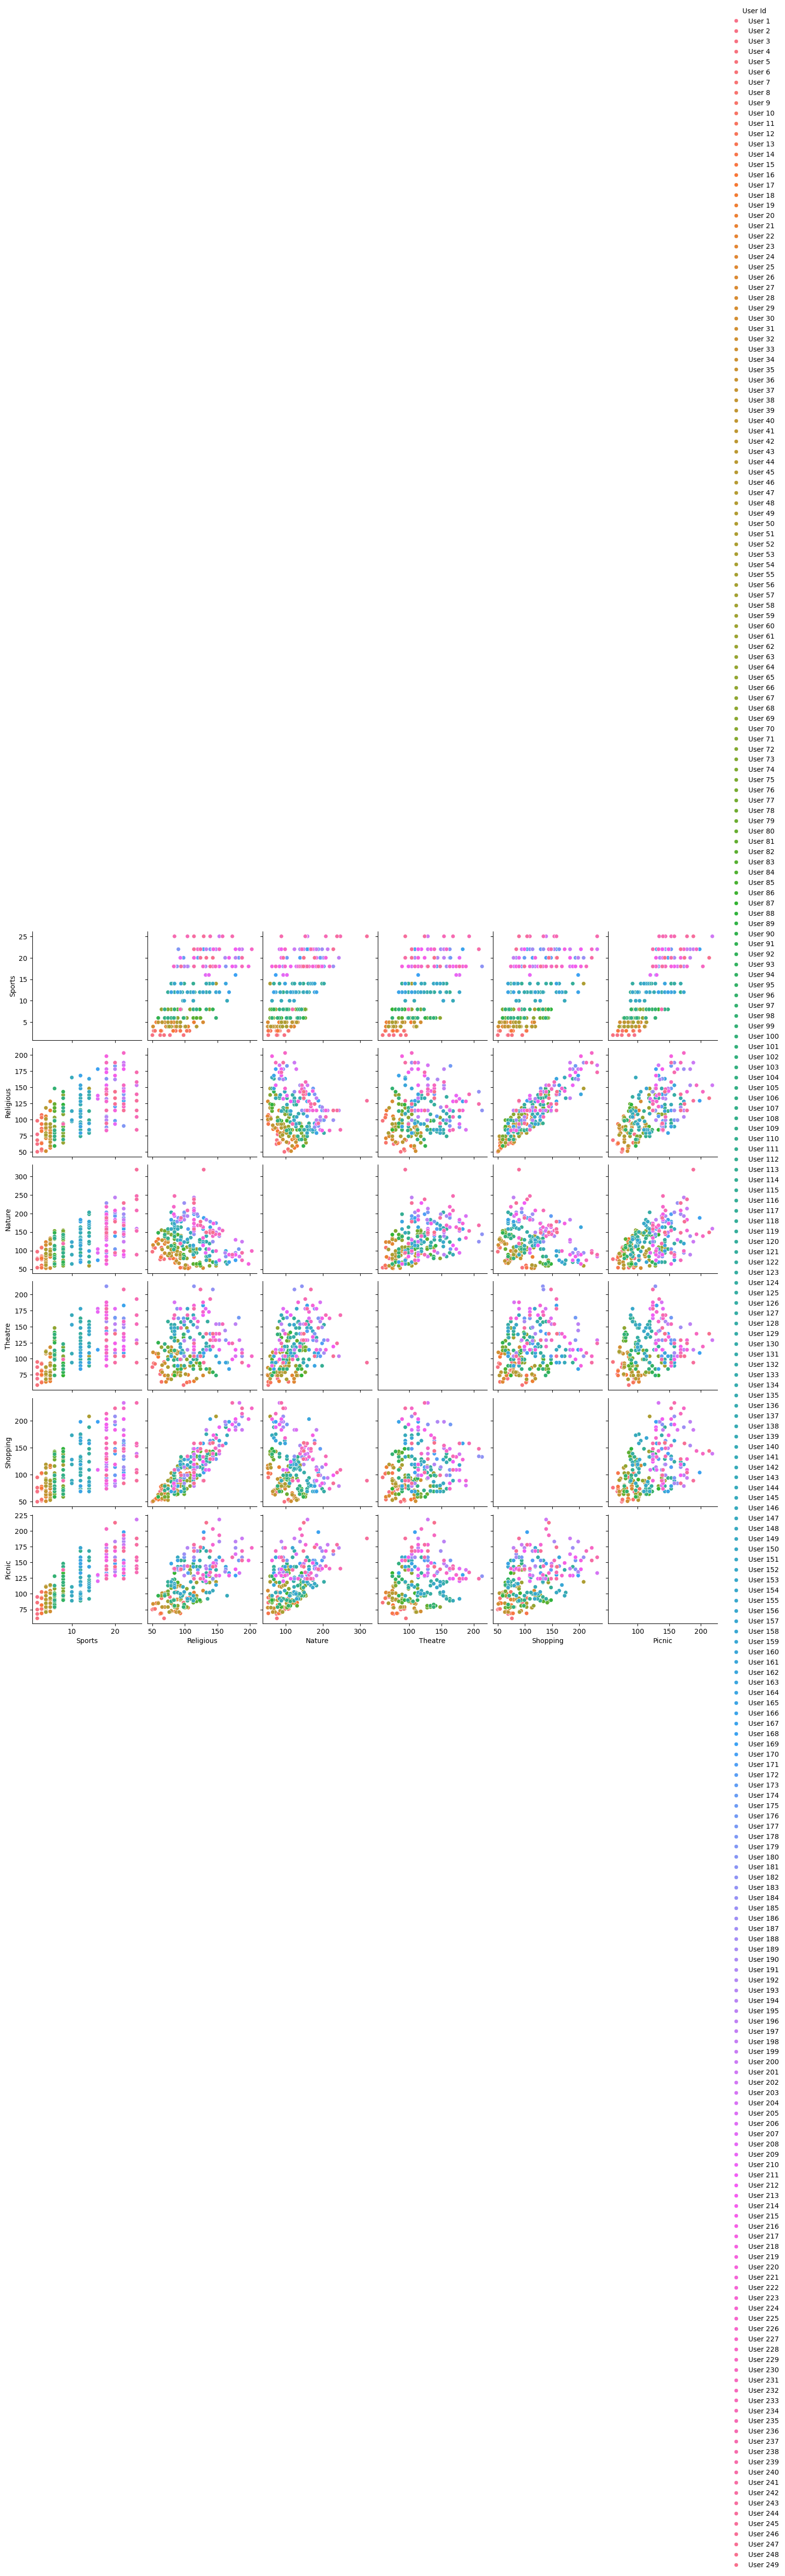

In [11]:
sns.pairplot(buddydata, hue='User Id', palette='husl')
plt.show()
# The colors here might not be the best, but they are different for each data point. 

Task 2.3: By looking at the pairplot, one might argue that based on features Nature and Shopping, the users could be grouped into 3 separate clusters. Plot only this scatterplot, with Nature on the x-axis and Shopping on the y-axis.

<Axes: xlabel='Nature', ylabel='Shopping'>

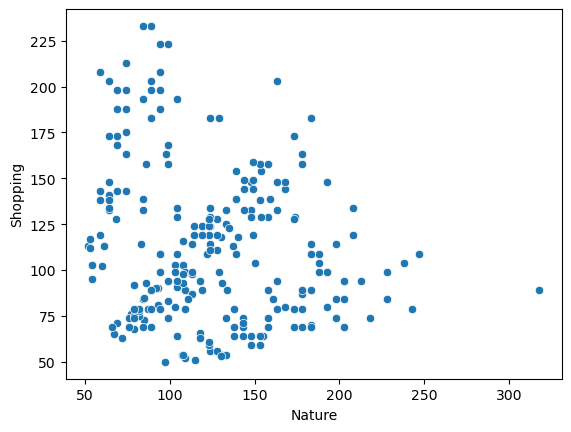

In [12]:
sns.scatterplot(buddydata, x="Nature", y="Shopping")

Task 2.4: Assuming that we have 3 different user groups, how would you describe each of these groups by looking at the scatterplot? Explain in your own words below based on how many reviews the users of each user group have made. See the website referred to in Task 2.1 for explanations of the features. 

By analyzing the scatterplot of nature vs shopping we can assume the following: <br>

Group 1: This group has high values in Shopping but low values in Nature. These users tend to review shopping related activities more frequently, while showing little interest in nature related experiences. <br>

Group 2: Users in this group tend to have high values in both Nature and Shopping. <br>

Group 3: This group shows the opposite pattern of Group 1,  they have high values in Nature and low values in Shopping. These users might prefer outdoor related activities and are less active in shopping related experiences. <br>

Task 2.5: Use Sklearn to build a k-means clustering model (for the 2-dimensional dataset of Task 2.3) with $k=3$, plot the corresponding scatterplot so that datapoints belonging to different clusters have different colors, and finally also print the corresponding silhouette score.

Silhouette Score: 0.42


C:\Users\zacke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


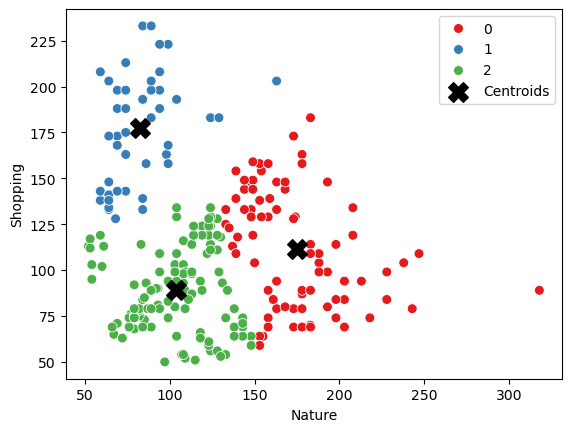

In [13]:
X = buddydata[["Nature", "Shopping"]]

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)
labels=kmeans.labels_

score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.2f}")

Centroids = kmeans.cluster_centers_

sns.scatterplot(x=X["Nature"], y=X["Shopping"], hue=labels, palette="Set1", s=50)
plt.scatter(Centroids[:, 0], Centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.legend()
plt.show()

Task 2.6: Use Sklearn to build a Gaussian mixture clustering model with 3 mixture components, plot the corresponding scatterplot so that datapoints belonging to different clusters have different colors, and finally also print the corresponding silhouette score.

Silhouette Score: 0.37


C:\Users\zacke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

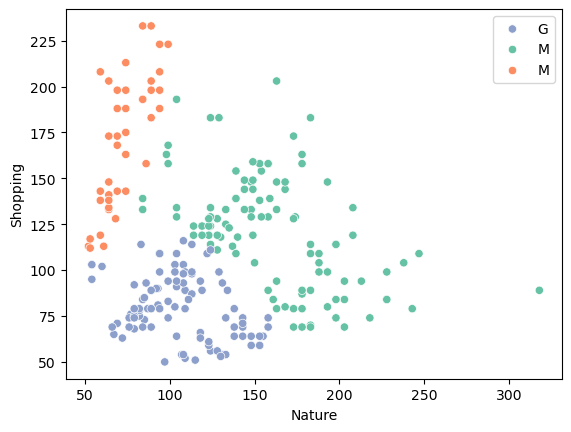

In [14]:
X = buddydata[["Nature", "Shopping"]]

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

labels = gmm.predict(X)

score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.2f}")

sns.scatterplot(x=X["Nature"], y=X["Shopping"], hue=labels, palette="Set2")
plt.legend("GMM")
plt.show

Task 2.7: Use Sklearn to build a DBSCAN clustering model with parameter values eps=1 and min_samples=1, plot the corresponding scatterplot so that datapoints belonging to different clusters have different colors, and finally also print the corresponding silhouette score.

Silhouette Score: 0.17


<function matplotlib.pyplot.show(close=None, block=None)>

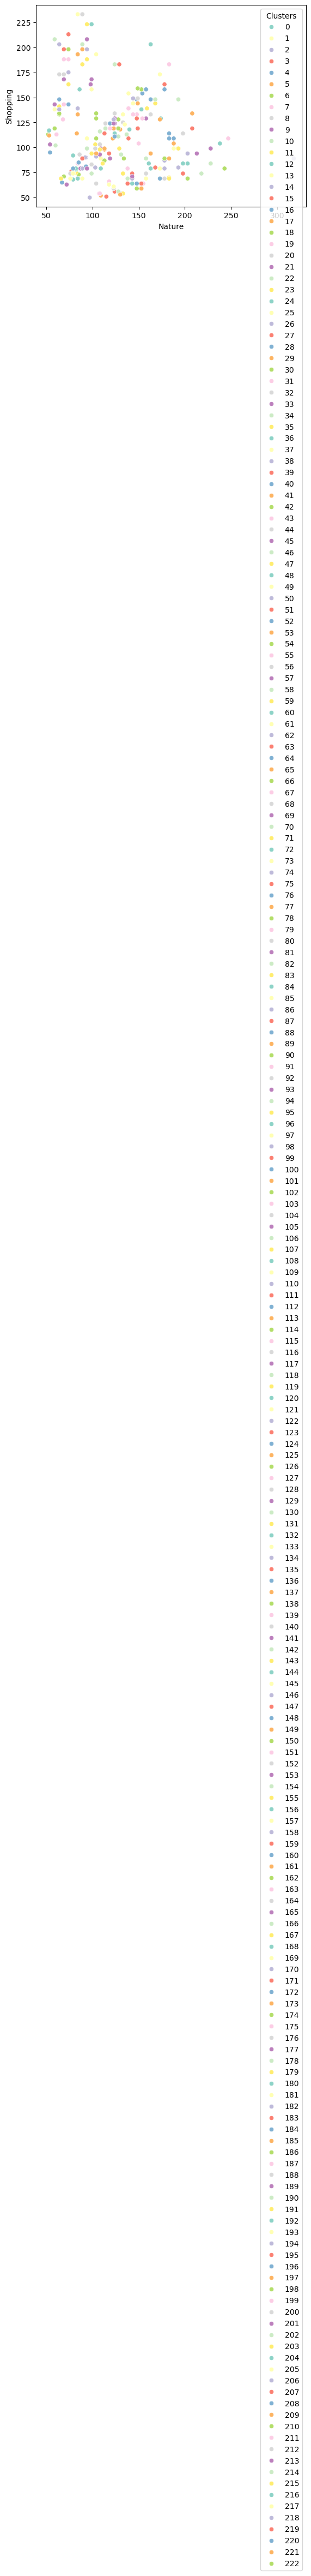

In [15]:
X = buddydata[["Nature", "Shopping"]]

dbscan = DBSCAN(eps=1, min_samples=1)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)


if n_clusters > 1:
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.2f}")

sns.scatterplot(x=X['Nature'], y=X['Shopping'], hue=labels, palette='Set3')
plt.legend(title="Clusters")
plt.show

Task 2.8: Try any other Sklearn clustering model (you can choose whichever you like), plot the corresponding scatterplot so that datapoints belonging to different clusters have different colors, and finally also print the corresponding silhouette score.

Silhouette Score: 0.32


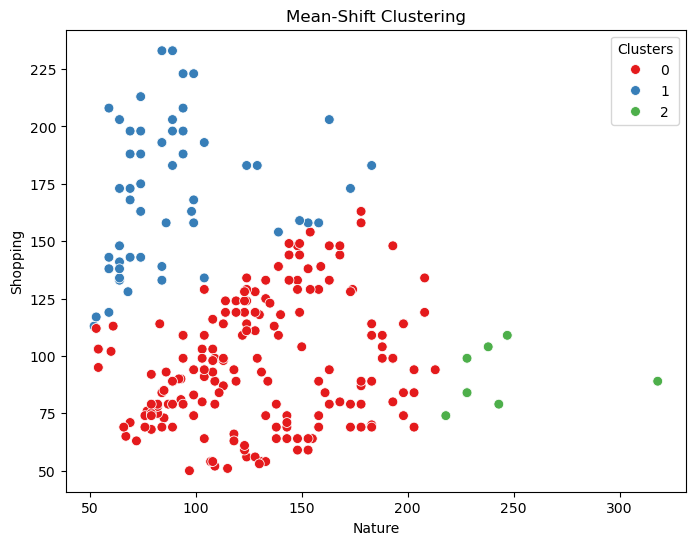

In [16]:
X = buddydata[["Nature", "Shopping"]]

# Fit MeanShift
meanshift = MeanShift()
labels = meanshift.fit_predict(X)

# Count clusters
n_clusters = len(set(labels))

# Silhouette score
if n_clusters > 1:
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.2f}")
else:
    print("Silhouette Score: Not defined (only one cluster found)")

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Nature'], y=X['Shopping'], hue=labels, palette='Set1', s=50)
plt.legend(title="Clusters")
plt.title("Mean-Shift Clustering")
plt.show()

Task 2.9: Which one of the four clustering models gave the best performance in terms of the silhouette score? Also explain in your own words which one you would recommend, and why?

After testing four different clustering models , the model that achieved the highest silhouette score was KMeans.

The silhouette score measures how well defined the clusters are by comparing how close each point is to points in its own cluster versus points in other clusters. A higher score indicates better defined, well separated clusters. So we would recommend KMeans in this case

## Task 3: PCA

Task 3.1: Here we continue with buddydata but only with the numeric columns. Save only the numeric columns of buddydata to a new variable called buddydatanum. Include all the numeric features, not just Nature and Shopping. Also print a snapshot of buddydatanum by simply writing the variable name.

In [17]:
buddydata_numeric = buddydata.select_dtypes(include="number")

buddydata_numeric

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86
...,...,...,...,...,...,...
244,18,139,148,129,129,168
245,22,114,228,104,84,168
246,20,124,178,104,158,174
247,20,133,149,139,144,213


Task 3.2: How many observations does the buddydatanum dataset contain? How many features does the buddydatanum dataset contain?

249 Observations
6 features

Task 3.3: Find the correlation matrix of buddydatanum, and use Seaborn to plot a heatmap of this correlation matrix.

<function matplotlib.pyplot.show(close=None, block=None)>

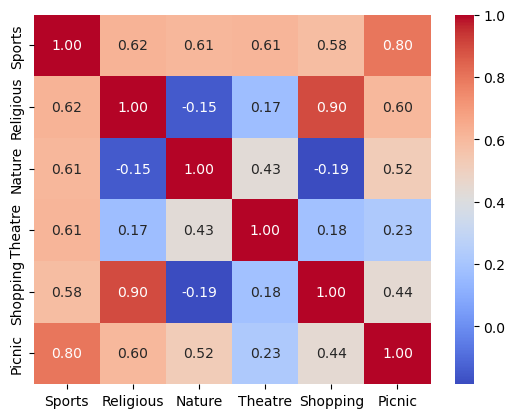

In [18]:
correlation_mat = buddydata_numeric.corr()

sns.heatmap(correlation_mat, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.show

Task 3.4: Explain in your own words what you see in the heatmap.

We can see that there are different colors spaning from red to blue. The red color show a strong positiv correlation between variables while the blue shows a strong negativ correlation between variables. The close the number is to 0 the closer it is to no correlation. 
<br>
For example we can see that Nature on the Y axis and Shopping on the X axis shows a -0.19 in blue color. This indicates a strong negativ correlation between the two variables. 


Task 3.5: Use the Sklearn PCA algorithm with two PCA components by the PCA fit() function on buddydatanum.

In [19]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(buddydata_numeric)

print(pca_result)

[[ -76.47851386  -39.07646975]
 [ -94.70958654  -43.83668935]
 [-105.02388102  -12.92333883]
 [ -85.64023716  -42.64106166]
 [ -57.33999241  -77.83141651]
 [ -99.00055307   -1.7429227 ]
 [ -87.80243796  -35.80378569]
 [ -97.12875252   -4.73116161]
 [ -90.30784083   -9.5906741 ]
 [ -63.38635513  -41.68493834]
 [ -42.4850726   -78.5156891 ]
 [ -45.06262733  -72.88737547]
 [ -86.91861734  -38.95129817]
 [ -58.8490658   -79.25554669]
 [ -85.68756421  -39.95826498]
 [ -73.54777748  -43.75301523]
 [ -83.85423045   20.41602977]
 [ -84.48687603   15.66925062]
 [ -76.68693107  -43.55766519]
 [ -23.24852716  -56.29966824]
 [ -60.05847929  -41.3641283 ]
 [ -41.81123724  -83.73559596]
 [ -72.25771412   -0.74829443]
 [ -76.96895523    2.53415909]
 [ -59.96934774  -29.33344001]
 [ -63.42734233  -20.27706422]
 [ -78.00010808   15.60092619]
 [ -14.87760905  -81.99577372]
 [ -73.2849966     2.57143853]
 [ -57.87272671  -25.95453395]
 [ -91.87430588   10.84529473]
 [ -71.57859371  -26.6277832 ]
 [ -42.5

Task 3.6: Find the explained variance ratios of the two PCA components.

In [20]:
print("Ratio",pca.explained_variance_ratio_)

Ratio [0.44690064 0.38897145]


Task 3.7: Repeat Task 3.5 and Task 3.6, but this time normalize the data using the preprocessing package. That is, first use the sklearn.preprocessing package to normalize buddydatanum, then run the Sklearn PCA algorithm with two PCA components by the PCA fit() function on the normalized version of buddydatanum.

In [21]:
scaler = StandardScaler()

buddydata_numeric_normalized = scaler.fit_transform(buddydata_numeric)

pca = PCA(n_components=2)
pca_results = pca.fit_transform(buddydata_numeric_normalized)

print(pca_results)
print("Ratio", pca.explained_variance_ratio_)

[[-2.72756680e+00 -4.92964093e-01]
 [-3.25584692e+00 -3.38331081e-01]
 [-3.28538732e+00  4.81321383e-01]
 [-3.02454764e+00 -3.07106217e-01]
 [-2.54046122e+00 -1.58188736e+00]
 [-3.02384721e+00  6.91834394e-01]
 [-2.99099753e+00 -1.93500717e-01]
 [-2.99771095e+00  6.01966954e-01]
 [-2.87698388e+00  2.28247838e-01]
 [-2.32303023e+00 -6.30735849e-01]
 [-2.10043825e+00 -1.69999200e+00]
 [-2.15525494e+00 -1.56068727e+00]
 [-2.98768825e+00 -2.59183365e-01]
 [-2.55224816e+00 -1.46800498e+00]
 [-2.98135442e+00 -2.90304161e-01]
 [-2.64192802e+00 -5.90835826e-01]
 [-2.39493202e+00  1.06645527e+00]
 [-2.42083657e+00  1.03564642e+00]
 [-2.48881115e+00 -3.11472473e-01]
 [-1.45948781e+00 -1.42969623e+00]
 [-2.20714804e+00 -6.58659807e-01]
 [-2.08643673e+00 -1.71879827e+00]
 [-2.27086159e+00  3.39516683e-01]
 [-2.44489754e+00  3.35923288e-01]
 [-2.09628453e+00 -3.69774991e-01]
 [-2.11017868e+00 -8.71216544e-02]
 [-2.30680583e+00  6.90937691e-01]
 [-1.27645049e+00 -1.98292095e+00]
 [-2.27226638e+00  3

Task 3.8: Is there a difference in how much variance the first principle component of the "not normalized" data (of Task 3.5) explains when compared with how much variance the first principle component of the normalized data (of Task 3.7) explains? That is, are the explained variance ratios of the first principle components different without and with normalization? If so, do you believe the difference is noteworthy? Explain in your own words.

Yes there is a difference, the first PC1 is on 44.69% while the normalized data PC1 is at 54.57% this show a indication of there being almost a 10% difference in the values from unnormalized data and normalized data. The first PC1 of the normalized data is beter at explaining a larger part of the data. <br>

The difference is noteworthy because there is a significat effect (ie 10% ish) on how much data each PC1 encludes, this shows that normalized data enables the PC1 to include more data and hench forth enabeling all the features in the dataset to contribute more equally. 

### Task 4: kNN classification

Task 4.1: Let's now go back to beandata, and let's now say that we are interested in classifying all the beans of beandata, but we only know the AspectRation and the Area of the beans, in addition to the corresponding Class of the beans. Use Scikit-learn to build a kNN classifier with $k=3$. Train the model with a random $80\%$ selection of the whole dataset, and leave the remaining $20\%$ of the dataset as the test set.

In [22]:
X = beandata[["AspectRation", "Area"]]
Y = beandata["Class"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.57


Task 4.2: Plot a Seaborn pairplot of the training set with only AspectRation and Area with hue set to Class.

C:\Users\zacke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\zacke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


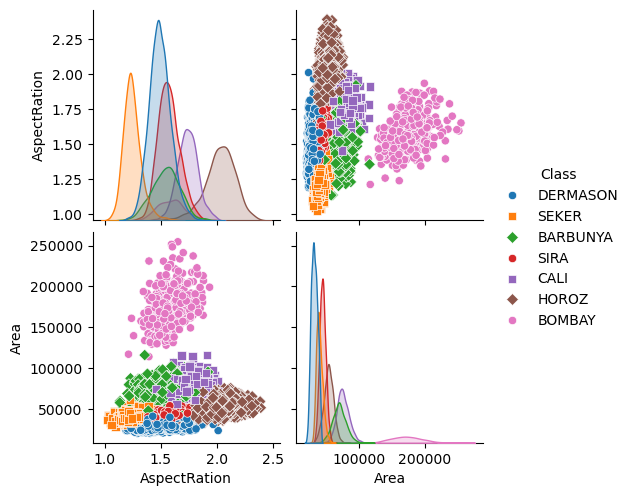

In [23]:
train_data = x_train.copy()  # Copy
train_data["Class"] = y_train  # Add the target variable Class to tdata frame

sns.pairplot(train_data, vars=["AspectRation", "Area"], hue="Class", markers=["o", "s", "D"])

plt.show()

Task 4.3: Plot a Seaborn pairplot of the test set with only AspectRation and Area with hue set to the predicted class of the kNN classifier that you just built.

C:\Users\zacke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\zacke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


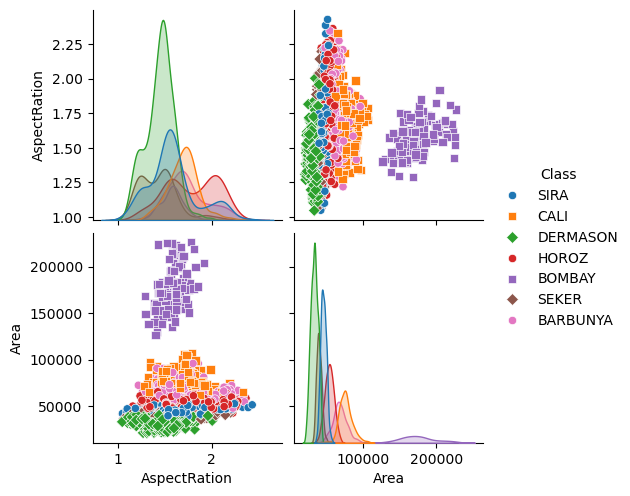

In [24]:
y_pred_test = knn.predict(x_test)

test_data = x_test.copy()
test_data["Class"] = y_pred_test  # Add the predicted class to the DataFrame

sns.pairplot(test_data, vars=["AspectRation", "Area"], hue="Class", markers=["o", "s", "D"])

plt.show()

Task 4.4: Describe what you see in the pairplots above in your own words. How good are the classification results in your opinion? Here it is not a requirement to find how many beans were misclassified etc., a simple explanation is enough to pass this practice task.

From what we can see here from the two pairplots above are the clusters of the beans, the different clusters represent different types. You can see a difference in between the not normalized and normalized data. But since there are many overlapping clusters we can conclude that many beans have been miss classified. In our opinion the classification results are not good, since the image is showing how the clusters keep overlapping with each other and it becomes hard to distinguish what bean is being miss placed. 